In [297]:
#nahrani knihoven
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from keras import Sequential
from keras import layers
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import collections
from sklearn import *

df = pd.read_csv('ReadyBanking.csv', sep=';', index_col=0)
df.head(5)

,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Money_Sum,Bank_Assurance_Amount,...,Home_Loan_Amount,Consumer_Loan_Amount,Loan_sum,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Trans_sum,New_Credit_Card_Flag
0,M,UpperMid,Normal,False,False,False,False,False,0.000000,True,...,True,False,20044.611429,False,False,False,False,False,0,0
1,F,Older,Normal,False,False,False,False,False,0.000000,False,...,False,True,2430.224286,True,True,False,False,False,7,0
2,M,UpperMid,Normal,True,False,False,False,False,18.825714,False,...,False,False,0.000000,False,False,False,False,False,0,0
3,M,UpperMid,Normal,False,True,False,False,False,603.791429,False,...,False,False,0.000000,True,True,False,False,True,26,0
4,F,Older,Normal,False,False,False,False,False,0.000000,False,...,False,True,2.720000,False,False,False,False,False,0,0


In [298]:
objList = df.select_dtypes(include = "object").columns

In [299]:
boList = df.select_dtypes(include = "bool").columns

In [217]:
boList

Index(['Saving_Amount', 'Current_Amount', 'Time_Deposits_Amount',
       'Funds_Amount', 'Stocks_Amount', 'Bank_Assurance_Amount',
       'Life_Assurance_Amount', 'Business_Loan_Amount', 'Home_Loan_Amount',
       'Consumer_Loan_Amount', 'Branch_Transactions', 'ATM_Transactions',
       'Phone_Transactions', 'Internet_Transactions', 'Standing_Orders'],
      dtype='object')

In [300]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


le = preprocessing.LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

#le.fit(df['Gender'])
#lrDf['Gender']=le.transform(lrDf['Gender'])


#le.fit(lrDf['Age_Cat'])
#lrDf['Age_Cat']=le.transform(lrDf['Age_Cat'])

#le.fit(lrDf['Ten_Cat'])
#lrDf['Ten_Cat']=le.transform(lrDf['Ten_Cat'])



#lrDf.head()

In [301]:
for feat in boList:
    df[feat] = le.fit_transform(df[feat].astype(str))

In [302]:
#Split na featury a cilovou promennou
X = df.drop(['New_Credit_Card_Flag'], axis=1)
y = df['New_Credit_Card_Flag']



In [303]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104728    0
104729    0
104730    0
104731    0
104732    0
Name: New_Credit_Card_Flag, Length: 104733, dtype: int64

In [304]:
#y.drop(y.tail(2).index, inplace=True)
X

,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Money_Sum,Bank_Assurance_Amount,...,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loan_sum,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Trans_sum
0,1,2,2,0,0,0,0,0,0.000000,1,...,0,1,0,20044.611429,0,0,0,0,0,0
1,0,1,2,0,0,0,0,0,0.000000,0,...,0,0,1,2430.224286,1,1,0,0,0,7
2,1,2,2,1,0,0,0,0,18.825714,0,...,0,0,0,0.000000,0,0,0,0,0,0
3,1,2,2,0,1,0,0,0,603.791429,0,...,0,0,0,0.000000,1,1,0,0,1,26
4,0,1,2,0,0,0,0,0,0.000000,0,...,0,0,1,2.720000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104728,1,2,0,1,0,0,0,0,112.900000,0,...,0,0,0,0.000000,1,0,0,0,0,1
104729,0,1,0,1,0,0,0,0,16.130000,0,...,0,0,0,0.000000,1,0,0,0,0,1
104730,1,3,0,0,0,0,0,0,0.000000,0,...,0,0,1,129.030000,0,0,0,0,0,0
104731,1,0,0,0,0,0,0,0,0.000000,0,...,0,0,1,807.740000,0,0,0,0,0,0


In [222]:
#Split na trenovaci a testovaci data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [223]:
#nacteni Scaleru -> prekoduje aby mean sloupcu byl 0 a std 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [224]:
train_scaled

array([[-1.20476554, -0.49192868,  1.38158404, ..., -0.09381576,
        -0.20309289, -0.54987033],
       [ 0.83003702,  0.40299785, -0.42574161, ..., -0.09381576,
        -0.20309289,  1.69457892],
       [-1.20476554,  1.29792439,  0.47792122, ..., -0.09381576,
        -0.20309289, -0.17579546],
       ...,
       [ 0.83003702, -1.38685522, -1.32940444, ..., -0.09381576,
        -0.20309289, -0.54987033],
       [-1.20476554, -1.38685522, -1.32940444, ..., -0.09381576,
        -0.20309289, -0.3628329 ],
       [-1.20476554,  1.29792439,  0.47792122, ..., -0.09381576,
        -0.20309289, -0.54987033]])

In [225]:
#jednoducha neuronova sit a jeji natrenovani
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
model = MLPClassifier(max_iter=100)
#specifikace parametru
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
#nalezeni nejlepsich parametru
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
#trenovani
clf.fit(train_scaled, y_train)

C:\Users\mates\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [226]:
#predikce
mlp_pred = clf.predict(test_scaled)

In [227]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, mlp_pred)

0.9589917410607725

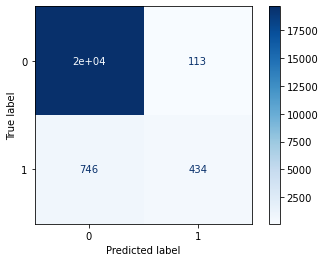

In [228]:
#confusion matice

disp = plot_confusion_matrix(clf, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [181]:
mlpPred = pd.DataFrame({
        'ActualValues': np.array(y_test).flatten(),
        'PredictedValues': mlp_pred})
mlpPred.head(30)

,ActualValues,PredictedValues
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,1,0
9,0,0


In [229]:
mlpPred['PredictedValues'].value_counts() #well ,that's bad ->predikuje všechno jako False

0    20394
1      553
Name: PredictedValues, dtype: int64

In [230]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [231]:
logRegScore = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print('logRegScore :', logRegScore*100,'%')

logRegScore : 94.73432949825751 %


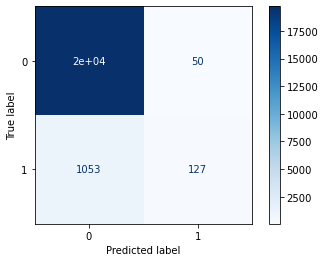

In [232]:
disp = plot_confusion_matrix(model, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [233]:
#Gradient boosted deTrees, nejlepsi model, jen trva dlouho pri hodne datech
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
#vypis parametru
params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBClassifier()
#vyber nejlepsich parametru
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001 )
#trenovani
rs.fit(train_scaled, y_train)

#predikce
y_pred = rs.best_estimator_.predict(test_scaled)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\mates\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.95749888 0.95525506 0.96001719        nan]
  warnings.warn(
C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:50:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [234]:
accuracy_score(y_test, y_pred)

0.9600420107891345

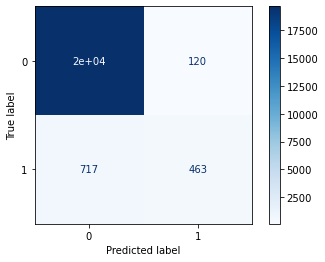

In [236]:
disp = plot_confusion_matrix(rs.best_estimator_, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()
#tady můžeme vidět, model je ve výsledku přesný, ale predikuje akorát tak hodnoty False, takže je k ničemu


## Modely s vybalancovanou cílovou promennou

In [35]:
#proto teď zkusíme vyřešit situaci imbalanced class pomocí oversamplingu i undersamplingu

In [327]:
#A teď vše znovu
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)
#reseni celeho problemu nevybalancovaneho datasetu 
#Nasampluje hodnoty s vyslednou promennou True a vemi podobnymi hodnoty aktualnim hodnotam s koncovou promennou True


In [328]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = "not majority")

X_train, y_train = ros.fit_resample(X_train,y_train)

In [329]:
#Nyní jsou hodnoty vyrovnané
y_train.value_counts()

0    79166
1    79166
Name: New_Credit_Card_Flag, dtype: int64

In [330]:
y_test.value_counts()

0    19767
1     1180
Name: New_Credit_Card_Flag, dtype: int64

In [331]:
#scaler upravi hodnoty aby byl mean 0 a std 1 pro kazdou feature zvlast
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [332]:
#Znovu to samé akorát s vybalancovaným datasetem
params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBClassifier()
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001 )
rs.fit(train_scaled, y_train)


y_pred = rs.best_estimator_.predict(test_scaled)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\mates\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.95516385 0.97791982 0.92623092        nan]
  warnings.warn(
C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:29:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [333]:
rs.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1,
 'learning_rate': 0.3583883653988028,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 354,
 'subsample': 0.8}

In [334]:
rs.best_score_

0.9779198195610747

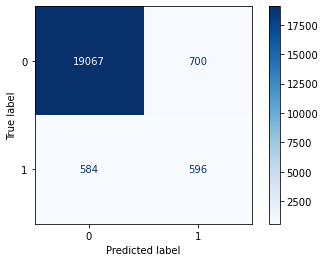

In [335]:
disp = plot_confusion_matrix(rs.best_estimator_, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [336]:
importance = rs.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01911
Feature: 1, Score: 0.01965
Feature: 2, Score: 0.02170
Feature: 3, Score: 0.02390
Feature: 4, Score: 0.02280
Feature: 5, Score: 0.02252
Feature: 6, Score: 0.02343
Feature: 7, Score: 0.03263
Feature: 8, Score: 0.03570
Feature: 9, Score: 0.03375
Feature: 10, Score: 0.02079
Feature: 11, Score: 0.02719
Feature: 12, Score: 0.02994
Feature: 13, Score: 0.06242
Feature: 14, Score: 0.02466
Feature: 15, Score: 0.04139
Feature: 16, Score: 0.02969
Feature: 17, Score: 0.06416
Feature: 18, Score: 0.35987
Feature: 19, Score: 0.03109
Feature: 20, Score: 0.05362


<AxesSubplot:>

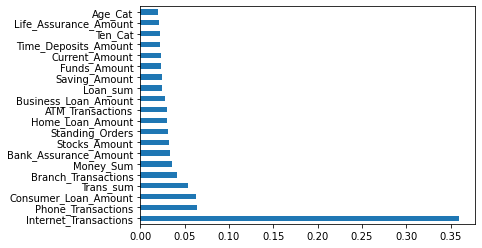

In [337]:
(pd.Series(rs.best_estimator_.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh'))

In [342]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = XGBClassifier()
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)

C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:37:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:37:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:37:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:37:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [344]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.93% (1.53%)


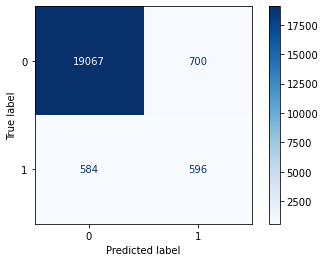

<Figure size 864x864 with 0 Axes>

In [345]:
from matplotlib.pyplot import figure
disp = plot_confusion_matrix(rs.best_estimator_, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)
figure(figsize=(12,12))
plt.show()

In [346]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19067,   700],
       [  584,   596]], dtype=int64)

In [2]:
#Znovu neuronka
model = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)

clf.fit(train_scaled, y_train)

NameError: name 'MLPClassifier' is not defined

In [1]:
clf.best_params_

NameError: name 'clf' is not defined

In [348]:
#nasazeni modelu
mlp_pred = clf.predict(test_scaled)

In [349]:
#sice to trva milion dni, ale krasny vysledek, v matici nize je i videt ze to neni jen 93% False
clf.best_score_

0.9081929290013123

In [350]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, mlp_pred)

array([[17897,  1870],
       [  567,   613]], dtype=int64)

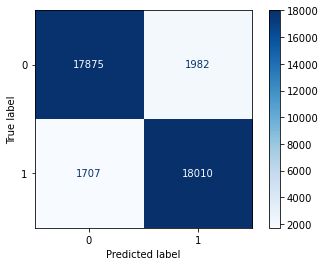

In [265]:
disp = plot_confusion_matrix(clf, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

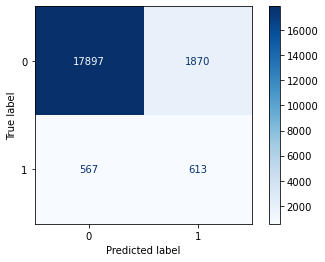

In [351]:
disp = plot_confusion_matrix(clf, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [266]:
#Logisticka regrese, spise demonstrativni, oproti mlp a gradient boostingu nema sanci
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
y_pred = model.predict(test_scaled)

In [268]:
logRegScore = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print('logRegScore :', logRegScore*100,'%')

logRegScore : 73.5129125183201 %


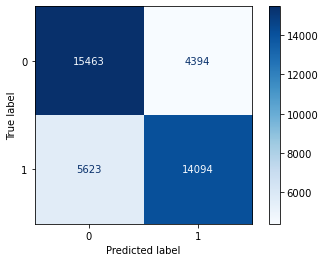

In [269]:
disp = plot_confusion_matrix(model, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

## 7 nejdůležitějších parametrů


In [274]:
shortDF = df[['Money_Sum','Internet_Transactions','Phone_Transactions','Consumer_Loan_Amount','Trans_sum','Branch_Transactions','Current_Amount','New_Credit_Card_Flag']]

In [275]:
shortDF.head(5)

,Money_Sum,Internet_Transactions,Phone_Transactions,Consumer_Loan_Amount,Trans_sum,Branch_Transactions,Current_Amount,New_Credit_Card_Flag
0,0.000000,0,0,0,0,0,0,0
1,0.000000,0,0,1,7,1,0,0
2,18.825714,0,0,0,0,0,0,0
3,603.791429,0,0,0,26,1,1,0
4,0.000000,0,0,1,0,0,0,0


In [276]:
objList = shortDF.select_dtypes(include = "object").columns

In [277]:
boList = shortDF.select_dtypes(include = "bool").columns

In [278]:
for feat in boList:
    df[feat] = le.fit_transform(df[feat].astype(str))

In [279]:
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

In [280]:
X = shortDF.drop(['New_Credit_Card_Flag'], axis=1)
y = shortDF['New_Credit_Card_Flag']

In [281]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = "not majority")

X_res, y_res = ros.fit_resample(X,y)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

In [283]:
#scaler upravi hodnoty aby byl mean 0 a std 1 pro kazdou feature zvlast
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [284]:
#Znovu to samé akorát s vybalancovaným datasetem
params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBClassifier()
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001 )
rs.fit(train_scaled, y_train)


y_pred = rs.best_estimator_.predict(test_scaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\mates\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.86968391 0.91288256 0.83548761        nan]
  warnings.warn(
C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [285]:
rs.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1,
 'learning_rate': 0.3583883653988028,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 354,
 'subsample': 0.8}

In [286]:
rs.best_score_

0.9128825598018956

<AxesSubplot:>

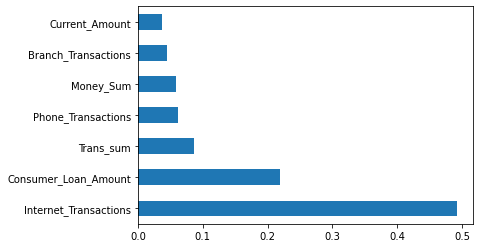

In [287]:
(pd.Series(rs.best_estimator_.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh'))

## Under Sampling

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [316]:
X

,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Money_Sum,Bank_Assurance_Amount,...,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loan_sum,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Trans_sum
0,1,2,2,0,0,0,0,0,0.000000,1,...,0,1,0,20044.611429,0,0,0,0,0,0
1,0,1,2,0,0,0,0,0,0.000000,0,...,0,0,1,2430.224286,1,1,0,0,0,7
2,1,2,2,1,0,0,0,0,18.825714,0,...,0,0,0,0.000000,0,0,0,0,0,0
3,1,2,2,0,1,0,0,0,603.791429,0,...,0,0,0,0.000000,1,1,0,0,1,26
4,0,1,2,0,0,0,0,0,0.000000,0,...,0,0,1,2.720000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104728,1,2,0,1,0,0,0,0,112.900000,0,...,0,0,0,0.000000,1,0,0,0,0,1
104729,0,1,0,1,0,0,0,0,16.130000,0,...,0,0,0,0.000000,1,0,0,0,0,1
104730,1,3,0,0,0,0,0,0,0.000000,0,...,0,0,1,129.030000,0,0,0,0,0,0
104731,1,0,0,0,0,0,0,0,0.000000,0,...,0,0,1,807.740000,0,0,0,0,0,0


In [317]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104728    0
104729    0
104730    0
104731    0
104732    0
Name: New_Credit_Card_Flag, Length: 104733, dtype: int64

In [318]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy = "majority")

X_train, y_train = ros.fit_resample(X_train,y_train)

,Gender,Age_Cat,Ten_Cat,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Money_Sum,Bank_Assurance_Amount,...,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Loan_sum,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,Trans_sum
0,1,0,0,1,0,1,0,0,117685.388571,0,...,0,0,0,0.000000,1,0,0,0,0,1
1,0,1,3,0,0,0,0,0,0.000000,0,...,0,0,1,720.830000,0,0,0,0,0,0
2,1,2,0,1,0,0,0,0,3.062857,0,...,0,0,0,0.000000,0,0,0,0,0,0
3,0,2,1,1,0,0,0,0,5.365000,0,...,0,0,1,9773.150000,0,0,0,0,0,0
4,1,2,3,0,0,0,0,0,0.000000,0,...,1,0,0,739.674286,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,3,2,1,0,0,0,0,11.461429,0,...,0,0,1,791.691429,1,0,0,0,0,6
9236,1,1,2,0,0,0,0,0,0.000000,0,...,0,0,0,0.000000,1,0,0,0,0,6
9237,0,3,0,0,1,0,0,0,418.374286,0,...,0,0,0,0.000000,1,1,0,0,0,16
9238,1,3,0,0,1,0,0,0,3.520000,0,...,0,0,0,0.000000,0,0,0,0,0,0


In [322]:
#scaler upravi hodnoty aby byl mean 0 a std 1 pro kazdou feature zvlast
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [323]:
#Znovu to samé akorát s vybalancovaným datasetem
params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBClassifier()
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001 )
rs.fit(train_scaled, y_train)


y_pred = rs.best_estimator_.predict(test_scaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\mates\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.78798701 0.77694805 0.80616883        nan]
  warnings.warn(
C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [324]:
rs.best_score_

0.8061688311688311

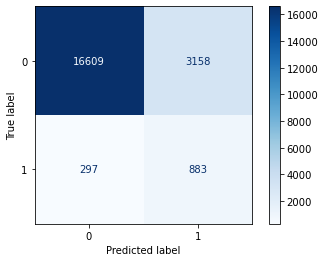

In [325]:
disp = plot_confusion_matrix(rs.best_estimator_, test_scaled, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

<AxesSubplot:>

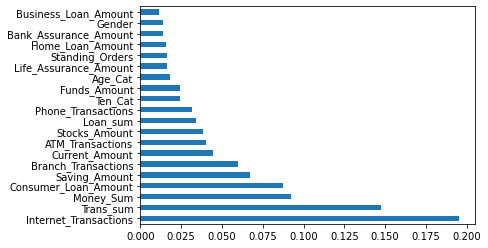

In [326]:
(pd.Series(rs.best_estimator_.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh'))